In [205]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

### Loading Data

In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import time
import datetime

panel_yield = pd.read_csv('panel_yield.csv', index_col=0)
panel_yield

,OP_NO,abbr,tft_side,LOT_ID,SHEET_ID,SHEET_STIME,INS_DATE,INS_WEEK,yield
0,3182,EE,1,EE11GB0HY1,EE01NB3170P10,2022/2/14 18:35,2022/2/14,2022W07,0.833333
1,3259,EE,1,EE12G10SY1,EE01NB2V60P16,2022/2/15 22:01,2022/2/15,2022W07,0.937500
2,3259,EE,1,EE12G10SY1,EE01NB2V60P17,2022/2/15 22:23,2022/2/15,2022W07,0.833333
3,3259,EE,1,EE12G10SY1,EE01NB2V60P18,2022/2/15 22:44,2022/2/15,2022W07,0.875000
4,3259,EE,1,EE12G10SY1,EE01NB2V60P19,2022/2/15 23:06,2022/2/15,2022W07,0.875000
...,...,...,...,...,...,...,...,...,...
199,3588,EE,1,EE12G10NY0,EE01NB3140P26,2022/2/13 08:17,2022/2/13,2022W07,0.854167
200,3588,EE,1,EE12G10NY0,EE01NB3170P23,2022/2/12 23:21,2022/2/12,2022W06,0.833333
201,3588,EE,1,EE12G10NY0,EE01NB3170P24,2022/2/12 23:40,2022/2/12,2022W06,0.791667
202,3588,EE,1,EE12G10NY0,EE01NB3170P25,2022/2/12 23:59,2022/2/12,2022W06,0.750000


### EWMA

,data,ewm_value,long_center_line,short_center_line,long_window_std,short_window_std,short_UCL,short_LCL,long_UCL,long_LCL,long_ewma_over,long_ewma_under,short_ewma_over,short_ewma_under,SHEET_ID
0,0.833333,0.833333,0.833333,0.833333,0.000000,0.000000,0.833333,0.833333,0.833333,0.833333,NaN,NaN,NaN,NaN,EE01NB3170P10
1,0.937500,0.843750,0.885417,0.885417,0.073657,0.073657,0.907514,0.863320,0.907514,0.863320,0.937500,NaN,0.937500,NaN,EE01NB2V60P16
2,0.833333,0.842708,0.868056,0.868056,0.060141,0.060141,0.892329,0.843782,0.892329,0.843782,NaN,0.833333,NaN,0.833333,EE01NB2V60P17
3,0.875000,0.845937,0.869792,0.869792,0.049227,0.049227,0.892983,0.846600,0.892983,0.846600,NaN,NaN,NaN,NaN,EE01NB2V60P18
4,0.875000,0.848844,0.870833,0.870833,0.042696,0.042696,0.893010,0.848657,0.893010,0.848657,NaN,NaN,NaN,NaN,EE01NB2V60P19
5,0.770833,0.841043,0.854167,0.854167,0.055902,0.055902,0.885217,0.823116,0.885217,0.823116,NaN,0.770833,NaN,0.770833,EE01NB2V60P20
6,0.854167,0.842355,0.854167,0.854167,0.051031,0.051031,0.883918,0.824415,0.883918,0.824415,NaN,NaN,NaN,NaN,EE01NB2V60P21
7,0.854167,0.843536,0.854167,0.857143,0.047246,0.050214,0.887493,0.826792,0.882723,0.825611,NaN,NaN,NaN,NaN,EE01NB2V60P22
8,0.875000,0.846683,0.856481,0.848214,0.044736,0.037489,0.871503,0.824926,0.884272,0.828690,NaN,NaN,0.875000,NaN,EE01NB3160P25
9,0.750000,0.837014,0.845833,0.836310,0.053970,0.053017,0.869949,0.802670,0.880077,0.811589,NaN,0.750000,NaN,0.750000,EE01NB3160P26


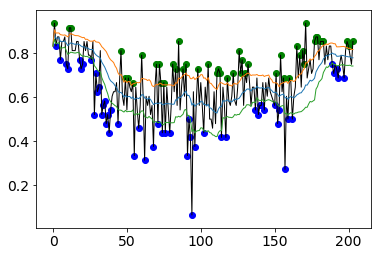

In [206]:
def ewma(data, L=3, a=0.1, long_window=21, short_window=7, plot = "short"):
    df = pd.DataFrame()
    df['data'] = data
    ewm = []
    
    # ewma value
    for i in range(len(data.tolist())):
        if i == 0:
            ewm.append(data[i])
            continue
        tmp = a*data[i] + (1-a)*ewm[i-1]
        ewm.append(tmp)
    df['ewm_value'] = ewm
    
    mean_long = []
    mean_short = []
    std_long = []
    std_short = []
    long_center_line = []
    short_center_line = []

    # imputation of mean & std value
    for i in range(len(data)):
        if i < long_window-1:
            mean_long.append(data[0:(i+1)].mean())
            std_long.append(data[0:(i+1)].std())

        if i < short_window-1:
            mean_short.append(data[0:(i+1)].mean())
            std_short.append(data[0:(i+1)].std())
    
    # center_line
    long_center_line = data.rolling(long_window).mean().tolist()
    long_center_line[:long_window-1] = mean_long
    df['long_center_line'] = long_center_line
    short_center_line = data.rolling(short_window).mean().tolist()
    short_center_line[:short_window-1] = mean_short
    df['short_center_line'] = short_center_line
    
    # std value
    long_window_std = data.rolling(long_window).std().tolist()
    long_window_std[:long_window-1] = std_long
    long_window_std[0] = 0
    df['long_window_std'] = long_window_std
    short_window_std = data.rolling(short_window).std().tolist()
    short_window_std[:short_window-1] = std_short
    short_window_std[0] = 0
    df['short_window_std'] = short_window_std
    
    # UCL&LCL(short)
    tmp_short_ucl = []
    tmp_short_lcl = []
    for i in range(len(data)):
        tmp_short_ucl.append(df.short_center_line.tolist()[i] + L*df.short_window_std.tolist()[i]*(((a/(2-a)*(1-(1-a)**(2*i))))**0.5))
        tmp_short_lcl.append(df.short_center_line.tolist()[i] - L*df.short_window_std.tolist()[i]*(((a/(2-a)*(1-(1-a)**(2*i))))**0.5))
    
    df['short_UCL'] = tmp_short_ucl
    df['short_LCL'] = tmp_short_lcl
     
    # UCL&LCL(long)
    tmp_long_ucl = []
    tmp_long_lcl = []
    for i in range(len(data)):
        tmp_long_ucl.append(df.long_center_line.tolist()[i] + L*df.long_window_std.tolist()[i]*(((a/(2-a)*(1-(1-a)**(2*i))))**0.5))
        tmp_long_lcl.append(df.long_center_line.tolist()[i] - L*df.long_window_std.tolist()[i]*(((a/(2-a)*(1-(1-a)**(2*i))))**0.5))
    
    df['long_UCL'] = tmp_long_ucl
    df['long_LCL'] = tmp_long_lcl

    # out spec counting
    df['long_ewma_over'] = [df.data.tolist()[x] if (df.data.tolist()[x] - df.long_UCL.tolist()[x]) >= 0 else np.nan for x in range(len(df.data.tolist()))]
    df['long_ewma_over'][0] = np.nan
    df['long_ewma_under'] = [df.data.tolist()[x] if (df.data.tolist()[x] - df.long_LCL.tolist()[x]) <= 0 else np.nan for x in range(len(df.data.tolist()))]
    df['long_ewma_under'][0] = np.nan
    df['short_ewma_over'] = [df.data.tolist()[x] if (df.data.tolist()[x] - df.short_UCL.tolist()[x]) >= 0 else np.nan for x in range(len(df.data.tolist()))]
    df['short_ewma_over'][0] = np.nan
    df['short_ewma_under'] = [df.data.tolist()[x] if (df.data.tolist()[x] - df.short_LCL.tolist()[x]) <= 0 else np.nan for x in range(len(df.data.tolist()))]
    df['short_ewma_under'][0] = np.nan
    

    
    
     # show plot
    if plot == 'long':
        plt.plot(data,linewidth = '1', color='black')
#         plt.plot(df['ewm_value'],linewidth = '1')
        plt.plot(df['long_center_line'],linewidth = '1')
        plt.plot(df['long_UCL'],linewidth = '1')
        plt.plot(df['long_LCL'],linewidth = '1')
        plt.scatter(y= df['long_ewma_under'].tolist(), x = df.index.tolist(),color="blue")
        plt.scatter(y= df['long_ewma_over'].tolist(), x = df.index.tolist(),color="green")
    
    if plot == 'short':
        plt.plot(data,linewidth = '1', color='black')
#         plt.plot(df['ewm_value'],linewidth = '1')
        plt.plot(df['short_center_line'],linewidth = '1')
        plt.plot(df['short_UCL'],linewidth = '1')
        plt.plot(df['short_LCL'],linewidth = '1')
        plt.scatter(y= df['short_ewma_under'].tolist(), x = df.index.tolist(),color="blue")
        plt.scatter(y= df['short_ewma_over'].tolist(), x = df.index.tolist(),color="green")
    return df


def grouping_by_ewma(ewma_df):
    # long_term
    





df_demo = pd.DataFrame()
df_demo['A'] = panel_yield['yield']
df_demo['SHEET_ID'] = panel_yield['SHEET_ID']
df = ewma(df_demo['A'], L=3, a=0.1, long_window=21, short_window=7, plot = "long")
df["SHEET_ID"] = df_demo['SHEET_ID']
df.to_csv('ewm.csv')
grouping_by_ewma(ewma_df=df)
display_side_by_side(df, titles=['ewma_result'])

### Pre-Processing

In [178]:
df_factor = panel_yield.loc[:, panel_yield.columns!='yield']
target_factor = panel_yield.loc[:, panel_yield.columns=='yield']

df_factor["OP_NO"] = df_factor["OP_NO"].astype(str)
df_factor["tft_side"] = df_factor["tft_side"].astype(str)

# Get one hot encoding of columns 'vehicleType'
one_hot = pd.get_dummies(df_factor[["OP_NO", "abbr", "LOT_ID", "tft_side", "INS_WEEK","INS_DATE"]])
# Drop column as it is now encoded
df_factor = df_factor.drop(["abbr", "LOT_ID", "OP_NO", "tft_side", "INS_WEEK","INS_DATE"],axis = 1)
# Join the encoded df
df_factor = df_factor.join(one_hot)

# factor & target
x, y = df_factor[df_factor.columns[~df_factor.columns.isin(['SHEET_ID','SHEET_STIME'])]].values, target_factor.values


# df_factor

C:\Users\BarryShih\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\BarryShih\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SHEET_ID,SHEET_STIME,OP_NO_3182,OP_NO_3259,OP_NO_3588,abbr_EB,abbr_EE,LOT_ID_EB12G109Y0,LOT_ID_EB12G10AY0,LOT_ID_EB12G10BY0,...,LOT_ID_EE12G10WY0,tft_side_1,INS_WEEK_2022W06,INS_WEEK_2022W07,INS_DATE_2022/2/11,INS_DATE_2022/2/12,INS_DATE_2022/2/13,INS_DATE_2022/2/14,INS_DATE_2022/2/15,INS_DATE_2022/2/16
0,EE01NB3170P10,2022/2/14 18:35,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,EE01NB2V60P16,2022/2/15 22:01,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,EE01NB2V60P17,2022/2/15 22:23,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,EE01NB2V60P18,2022/2/15 22:44,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,EE01NB2V60P19,2022/2/15 23:06,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,EE01NB3140P26,2022/2/13 08:17,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
200,EE01NB3170P23,2022/2/12 23:21,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
201,EE01NB3170P24,2022/2/12 23:40,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0
202,EE01NB3170P25,2022/2/12 23:59,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,0


### raw data相關矩陣

                       yield  OP_NO_3182  OP_NO_3259  OP_NO_3588   abbr_EB  \
yield               1.000000    0.084278    0.449912   -0.460164 -0.671752   
OP_NO_3182          0.084278    1.000000   -0.027412   -0.175966 -0.098174   
OP_NO_3259          0.449912   -0.027412    1.000000   -0.979203 -0.546308   
OP_NO_3588         -0.460164   -0.175966   -0.979203    1.000000  0.557911   
abbr_EB            -0.671752   -0.098174   -0.546308    0.557911  1.000000   
abbr_EE             0.671752    0.098174    0.546308   -0.557911 -1.000000   
LOT_ID_EB12G109Y0  -0.184767   -0.029143   -0.162174    0.165618  0.296855   
LOT_ID_EB12G10AY0  -0.213157   -0.029143   -0.162174    0.165618  0.296855   
LOT_ID_EB12G10BY0  -0.314546   -0.029143   -0.162174    0.165618  0.296855   
LOT_ID_EB12G10CY0  -0.002913   -0.019773   -0.110030    0.112367  0.201406   
LOT_ID_EB12G10EY0  -0.182740   -0.029143   -0.162174    0.165618  0.296855   
LOT_ID_EE11GB0HY1   0.084278    1.000000   -0.027412   -0.175966

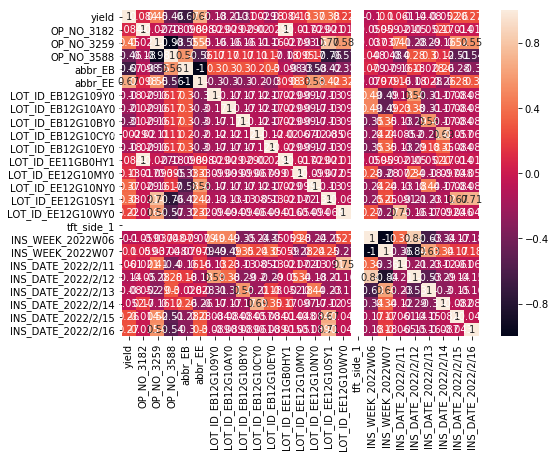

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = df_factor.corr(method='pearson')
print(corr_df)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

### Lasso + RF + Kneedle

In [77]:
def lasso_summary(x, y):
    scaler = StandardScaler()
    y_scale = scaler.fit_transform(y.reshape(-1, 1))
    lasso_model = LassoCV(positive=True, max_iter=10000, fit_intercept=False)
    lasso_model.fit(x, y_scale)
    df_ouput = pd.DataFrame(columns=['Method', 'OPID_TOOLID', 'IndexValue']) # Declare df_ouput
    lasso_model_coef = lasso_model.coef_
    idx, names = 0, list(df_factor[df_factor.columns[~df_factor.columns.isin(['SHEET_ID','SHEET_STIME'])]].columns) 
    
    for ele in sorted(zip(map(lambda x: np.round(x, 4), lasso_model_coef), names), reverse=True, key=lambda x:abs(x[0])):
        if ele[0]==0: break
        df_ouput.loc[idx, :] = ['Lasso', ele[1], ele[0]]
        idx+=1
    return df_ouput

def rf_summary(x, y):
    forest = ensemble.RandomForestRegressor(n_estimators = 100,random_state = 11850)
    forest_fit = forest.fit(x, y)
    
    df_output = pd.DataFrame(columns=['Method', 'OPID_TOOLID', 'IndexValue']) # Declare df_output
    idx = 0
    
    for ele in sorted(zip(map(lambda x: round(x, 4), forest_fit.feature_importances_), list(df_factor[df_factor.columns[~df_factor.columns.isin(['SHEET_ID','SHEET_STIME'])]].columns)), reverse=True, key=lambda x:abs(x[0])):
        if ele[0]==0: break
        df_output.loc[idx, :] = ['RF', ele[1], ele[0]]
        idx+=1
    return df_output

def kneedle_function(kn_y_label, kn_y):
    """
    Run kneedle function.
    """
    try:
        kn_x = list(range(1, len(kn_y)+1))
        kn = KneeLocator(kn_x, kn_y, curve='convex', direction='decreasing')
        kneedle_result_ls = kn_y_label[:kn.knee]
    except:
        kneedle_result_ls = kn_y_label
    return kneedle_result_ls

def kneedle_optoolidresult_calcu(df_ls):
    """
    Output intersection of freqency of Lasso and RF results.
    """
    df_result = pd.DataFrame(columns=['Method', 'OPID_TOOLID', 'IndexValue']) ### declare df_result
    row_dict = {} ### dict of op_tool_id_name
    for df in df_ls:
        Kresult_ls = df['KneedleResult'].values.tolist()
        for factor_name in Kresult_ls:
            op_tool_id_name = factor_name
            if op_tool_id_name not in df_result['OPID_TOOLID'].values.tolist():
                ### Add row
                row_dict[op_tool_id_name] = df_result.shape[0]
                df_result.loc[df_result.shape[0], :] = ['Kneedle', op_tool_id_name, 1] 
            else:
                ### Find row and add freq
                freq_idx = df_result.columns.get_loc('IndexValue')
                df_result.iloc[row_dict[op_tool_id_name], freq_idx]+=1
    df_result = df_result.sort_values(by='IndexValue', ascending=False).reset_index(drop=True)
    return df_result


def kneedle_summary(df_ls):
    df_kneedle_result_ls = []
    for df in df_ls:
        kn_y_ls = df.iloc[:,2].values[:20]
        kn_y_label_ls = df.iloc[:,1].values[:20]
        kneedle_result_ls = kneedle_function(kn_y_label_ls, kn_y_ls) ### Kneedle Function
        df_result = pd.DataFrame(data=kneedle_result_ls, columns=['KneedleResult'])
        df_kneedle_result_ls.append(df_result)
    df_result = kneedle_optoolidresult_calcu(df_kneedle_result_ls)
    return df_result


lasso_output = lasso_summary(x,y)
rf__output = rf_summary(x,y)

tmp_weight = sum(lasso_output['IndexValue'])/len(lasso_output['IndexValue'])
weight_ls = lasso_output['IndexValue']/tmp_weight
weight_ls.name = 'weight_IndexValue'
lasso_output_1 = pd.concat([lasso_output,weight_ls],axis=1)
# lasso_output_1

tmp_weight = sum(rf__output['IndexValue'])/len(rf__output['IndexValue'])
weight1_ls = rf__output['IndexValue']/tmp_weight
weight1_ls.name = 'weight_IndexValue'
rf_output_1 = pd.concat([rf__output,weight1_ls],axis=1)
# rf_output_1

output = pd.concat([lasso_output_1, rf_output_1])
output1 = output.sort_values(by='OPID_TOOLID')
kneedle_output = kneedle_summary([lasso_output_1, rf_output_1]) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BarryShih\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [204]:
display_side_by_side(lasso_output,rf__output,output1,kneedle_output, titles=['lasso','rf', 'lasso+rf', 'kneedle'])

,Method,OPID_TOOLID,IndexValue
0,Lasso,abbr_EE,0.7226
,Method,OPID_TOOLID,IndexValue
0,RF,abbr_EE,0.4574
1,RF,abbr_EB,0.4072
2,RF,LOT_ID_EB12G10BY0,0.0241
3,RF,LOT_ID_EB12G10CY0,0.0221
4,RF,INS_DATE_2022/2/11,0.017
5,RF,LOT_ID_EE12G10SY1,0.0139
6,RF,LOT_ID_EE12G10MY0,0.0123
7,RF,INS_DATE_2022/2/13,0.0094


### by abbr

In [83]:
df_factor_1 = panel_yield
df_factor_1["OP_NO"] = df_factor_1["OP_NO"].astype(str)
df_factor_1["tft_side"] = df_factor_1["tft_side"].astype(str)
# Get one hot encoding of columns 'vehicleType'
one_hot = pd.get_dummies(df_factor_1[["OP_NO", "abbr", "LOT_ID", "tft_side", "INS_WEEK","INS_DATE"]])
# Drop column as it is now encoded
df_factor_1 = df_factor_1.drop(["abbr", "LOT_ID", "OP_NO", "tft_side", "INS_WEEK","INS_DATE"],axis = 1)
# Join the encoded df
df_factor_1 = df_factor_1.join(one_hot)

df_EB = df_factor_1[df_factor_1['abbr_EB']==1]
df_EB = df_EB.set_index("SHEET_ID")
df_EE = df_factor_1[df_factor_1['abbr_EE']==1]
df_EE = df_EE.set_index("SHEET_ID")
display_side_by_side(df_EB,df_EE, titles=["df_EB", "df_EE"])

,SHEET_STIME,yield,OP_NO_3182,OP_NO_3259,OP_NO_3588,abbr_EB,abbr_EE,LOT_ID_EB12G109Y0,LOT_ID_EB12G10AY0,LOT_ID_EB12G10BY0,LOT_ID_EB12G10CY0,LOT_ID_EB12G10EY0,LOT_ID_EE11GB0HY1,LOT_ID_EE12G10MY0,LOT_ID_EE12G10NY0,LOT_ID_EE12G10SY1,LOT_ID_EE12G10WY0,tft_side_1,INS_WEEK_2022W06,INS_WEEK_2022W07,INS_DATE_2022/2/11,INS_DATE_2022/2/12,INS_DATE_2022/2/13,INS_DATE_2022/2/14,INS_DATE_2022/2/15,INS_DATE_2022/2/16
SHEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
ED01NB5A80P01,2022/2/12 07:51,0.520833,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
ED01NB5A80P02,2022/2/12 08:11,0.708333,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
ED01NB5A80P03,2022/2/12 08:30,0.625000,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
ED01NB5A80P04,2022/2/12 08:49,0.645833,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
ED01NB5A80P05,2022/2/12 09:11,0.812500,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
ED01NB5A80P06,2022/2/12 09:30,0.520833,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
ED01NB5A80P07,2022/2/12 09:49,0.562500,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
ED01NB5A80P08,2022/2/12 10:09,0.583333,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
ED01NB5A80P09,2022/2/12 10:28,0.479167,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0


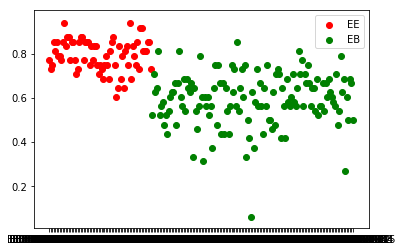

In [161]:
# SCATTER BY ABBR
import numpy as np
from matplotlib import pyplot as plt

scatter_EE_yield = df_EE.loc[:, df_EE.columns=='yield']
scatter_EB_yield = df_EB.loc[:, df_EB.columns=='yield']


plt.scatter(y= scatter_EE_yield['yield'].tolist(), x = scatter_EE_yield.index.tolist(),color="red", label="EE")
plt.scatter(y= scatter_EB_yield['yield'].tolist(), x = scatter_EB_yield.index.tolist(),color="green", label="EB")
plt.legend()
plt.show()

C:\Users\BarryShih\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


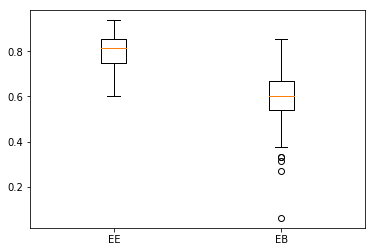

In [114]:
# BOX PLOT
import numpy as np
from matplotlib import pyplot as plt


scatter_EE_yield = df_EE.loc[:, df_EE.columns=='yield']
scatter_EB_yield = df_EB.loc[:, df_EB.columns=='yield']

plt.boxplot([scatter_EE_yield['yield'], scatter_EB_yield['yield']])
plt.xticks([1, 2], ['EE', 'EB'])
plt.show()